# Visualize one robot for one day

Analize the result of an experiment that involves running one robot for one day. This experiment was specified by the exp/run of type __1robot1day__. It is expected that the experiment was run by running the notebook Run-1Robot1Day, which means that the corresponding results had been left in the "results.pickle" file in the exp/run datadir. 

This notebook loads those results and visualizes them. 

In [1]:
import sys
sys.path.append("..")
from settings import Config
import pathlib
from pprint import pprint
import gzip as compress
import pickle

from WbfFigures import end_of_day_graphs

In [ ]:
# the experiment for the robot run
experiment = "1robot1day"

# run = "rwp-ad-30"
# run = "fblm-ad-30"
run = "fblm-gp-30"

exp = Config().get_experiment(experiment, run)
pprint(exp)

resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
if not resultsfile.exists():
    print(f"Results file does not exist:\n{resultsfile}")
    print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
    raise Exception("Nothing to do.")


Loading pointer config file: C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\1robot1day\fblm-miniberry-30_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: 1robot1day/fblm-miniberry-30 successfully loaded
{'data_dir': WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/WBF/ExperimentData/1robot1day/fblm-miniberry-30'),
 'exp_environment': 'miniberry-30',
 'exp_estimator': 'AdaptiveDisk',
 'exp_policy': 'fixed-budget-lawnmower',
 'exp_run_sys_indep_file': WindowsPath('C:/Users/lboloni/Documents/Code/_Checkouts/WBF/WaterberryFarms/experiment_configs/1robot1day/fblm-miniberry-30.yaml'),
 'exp_score': 'weighted_asymmetric',
 'group_name': '1robot1day',
 'im_resolution': 10,
 'run_name': 'fblm-min

In [3]:
with compress.open(resultsfile, "rb") as f:
    results = pickle.load(f)
# if "picture-path" in results:
#     print("Picture path in results!")
#     picture_paths.append(results["picture-path"])


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 44 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'L', 'M', 'R', 'S', 'T', 'V', 'Y', 'a', 'b', 'c', 'd', 'e', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 36, 37, 38, 39, 40, 41, 43, 47, 48, 53, 54, 55, 57, 60, 68, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
INFO:fontTools.subset:Closed glyp

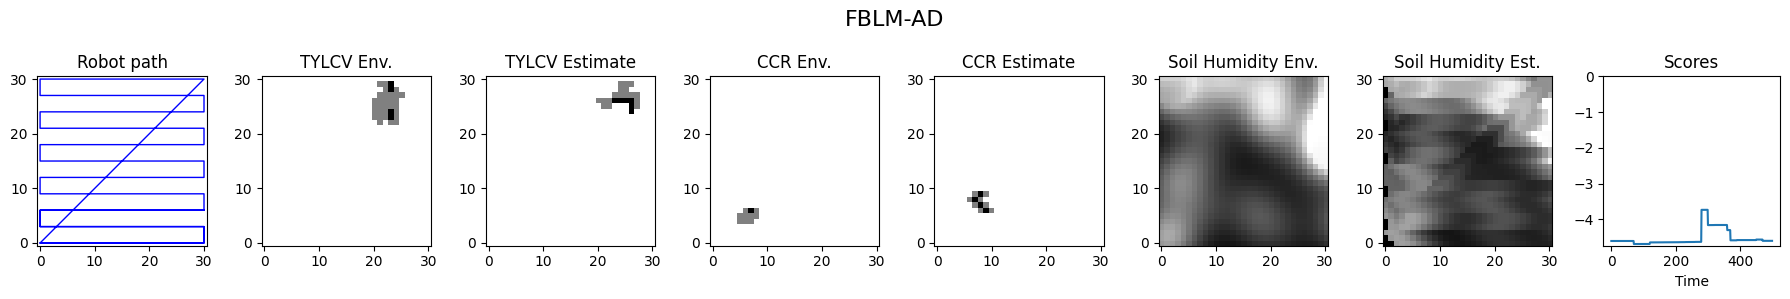

In [4]:
end_of_day_graphs(results, "daily-summary.pdf", plot_uncertainty = False)